In [1]:
from __future__ import print_function
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd

import tensorflow as tf
import datetime
import os
from time import time

C:\Users\LDH\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Path to saved model weights(as hdf5)
resume_weights = "model/net-cnn-best.hdf5"

# Hyper-parameters
batch_size = 128
num_classes = 15
epochs = 32

# input image dimensions
img_rows, img_cols = 64, 32

In [9]:
PATH = 'tmp/x_train/balanced-raw0_10000'
temp = pd.read_csv(PATH, dtype=np.uint8, sep=',', header=None, index_col=0)


In [10]:
temp.shape

(10000, 2048)

In [11]:
temp.shape

(10000, 2048)

In [12]:
temp.head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
temp.tail()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
temp.shape

(10000, 2048)

In [14]:
def get_file_name_sorted(path):
    fileNames = os.listdir(path)
    li = list()
    for name in fileNames:
        index = int(name.rsplit('_', 1)[1])
        li.append((index, name))

    li = sorted(li, key=lambda x: x[0])
    return [i for (_, i) in li]

def get_training_data():
    y_train_path = 'tmp/y_train/y_train_raw'
    x_train_path = 'tmp/x_train'
    
    y_train0 = pd.read_csv(y_train_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    
    x_train_files = get_file_name_sorted(x_train_path)
    x_train0 = None
#     for i in range(len(x_train_files)):
    for i in range(6):
        file_path = x_train_path+'/'+x_train_files[i]
        print(file_path)
        if i == 0:
            x_train0 = pd.read_csv(file_path, dtype=np.uint8, sep=',', header=None, index_col=0)
            print(x_train0.shape)
        else:
            temp = pd.read_csv(file_path, dtype=np.uint8, sep=',', header=None, index_col=0)
            x_train0 = pd.concat([pd.DataFrame(x_train0), pd.DataFrame(temp)])
        
    return (x_train0, y_train0)

In [15]:
x_train,y_train = get_training_data()

C:\Users\LDH\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


tmp/x_train/balanced-raw0_10000
(10000, 2048)
tmp/x_train/balanced-raw1000000_1010000
tmp/x_train/balanced-raw100000_110000
tmp/x_train/balanced-raw10000_20000
tmp/x_train/balanced-raw1010000_1020000
tmp/x_train/balanced-raw1020000_1030000


In [16]:
print(x_train.shape, y_train.shape)

(60000, 2048) (2038140, 1)


In [23]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
9995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y_train.shape

(2038140, 2)

In [36]:
def get_val_data():
    x_val_path = "tmp/X_val/X_val_raw"
    y_val_path = "tmp/y_val/y_val_raw"
    
    x_val = pd.read_csv(x_val_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    y_val = pd.read_csv(y_val_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    return (x_val, y_val)

In [37]:
x_val, y_val = get_val_data()

In [38]:
print(x_val.shape, y_val.shape)

(226460, 2048) (226460, 1)


In [21]:
x_train, y_train = x_val[:60000], y_val[:60000]
x_test, y_test = x_val[60000:80000], y_val[60000:80000]

In [13]:
def get_test_data():
    x_test_path = 'tmp/X_test/X_test_raw'
    y_test_path = "tmp/y_test/y_test_raw"
   
    x_test = pd.read_csv(x_test_path, dtype=np.uint8, sep=',', header=None, index_col=0).reset_index() 
    y_test = pd.read_csv(y_test_path, dtype=np.uint8, sep=',', header=None, index_col=0).reset_index() 
    
    return (x_test, y_test)

In [22]:
# MNIST handwritten image classification
# the data, shuffled and split between train and test sets

# Reshape strategy according to backend
if K.image_data_format() == 'channels_first':
    x_train = x_train.values.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
    # 1 x 28 x 28 [number_of_channels (colors) x height x weight]
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)
    # 28 x 28 x 1 [height x weight x number_of_channels (colors)]
    input_shape = (img_rows, img_cols, 1)
    
# Reshape, type, normalized, print
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# Dataset info
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(np.unique(y_train), np.unique(y_test))

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, y_test.shape)

x_train shape: (60000, 64, 32, 1)
60000 train samples
20000 test samples
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14] [ 0  1  2  3  4  5  6  7 10 11 12 14]
(60000, 15) (20000, 15)


In [23]:
print(y_train.shape)
print(y_test.shape)

(60000, 15)
(20000, 15)


In [26]:
def buildModel():
    # MODEL
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 2), activation='relu'))
   
    model.add(Conv2D(256, (3, 2), activation='relu'))
  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
   
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))
    # CEE, Adam
    model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(),
            metrics=['accuracy'])
    return model

In [27]:
print(datetime.datetime.now().strftime('%Y%m%d_%H_%M_%S'))


20191215_21_25_59


In [28]:
def train(model, is_resume_weight = False, resume_weights_path=''):
    # If exists a best model, load its weights!
    if is_resume_weight:
        if os.path.isfile(resume_weights_path):
            print ("Resumed model's weights from {}".format(resume_weights))
            # load weights
            model.load_weights(resume_weights_path)
            return 


    # Checkpoint In the /output folder
    filepath = "output/net-cnn-best.hdf5"
    os.makedirs('output', exist_ok=True)

    # Keep only a single checkpoint, the best over test accuracy.
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs\{}".format(str(datetime.datetime.now().strftime('%Y%m%d_%H_%M_%S'))), histogram_freq=1)

    # Train
    hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test), 
                callbacks=[tensorboard_callback, checkpoint])
    print(hist.history.keys())
    model.save_weights(filepath, overwrite=True)

In [29]:
keras.backend.clear_session() # It is important if to create the model twice
tf.summary.FileWriterCache.clear()

model = buildModel()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 13, 128)       49280     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 12, 256)       196864    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 6, 256)        0         
__________

C:\Users\LDH\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [30]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(keras.__version__)
K.tensorflow_backend._get_available_gpus()

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6690163543262387021
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 9290641572
locality {
  bus_id: 1
}
incarnation: 9573063997996879670
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0"
]
2.2.2


['/gpu:0']

In [31]:
train(model)

Train on 60000 samples, validate on 20000 samples
Epoch 1/32
60000/60000 [==============================] - 19s 314us/step - loss: 0.2161 - acc: 0.9335 - val_loss: 0.0991 - val_acc: 0.9651

Epoch 00001: val_acc improved from -inf to 0.96515, saving model to output/net-cnn-best.hdf5
Epoch 2/32
60000/60000 [==============================] - 18s 294us/step - loss: 0.1021 - acc: 0.9633 - val_loss: 0.0825 - val_acc: 0.9684

Epoch 00002: val_acc improved from 0.96515 to 0.96840, saving model to output/net-cnn-best.hdf5
Epoch 3/32
60000/60000 [==============================] - 18s 295us/step - loss: 0.0898 - acc: 0.9666 - val_loss: 0.0786 - val_acc: 0.9694

Epoch 00003: val_acc improved from 0.96840 to 0.96940, saving model to output/net-cnn-best.hdf5
Epoch 4/32
60000/60000 [==============================] - 18s 294us/step - loss: 0.0850 - acc: 0.9675 - val_loss: 0.0745 - val_acc: 0.9686

Epoch 00004: val_acc did not improve from 0.96940
Epoch 5/32
60000/60000 [==============================]

In [44]:
x_val[80000:].shape

(146460, 2048)

In [46]:
x_eval = np.reshape(x_val.values[80000:], (146460, 64, 32, 1))

# convert class vectors to binary class matrices
y_eval = keras.utils.to_categorical(y_val[80000:], num_classes)

In [47]:
# Eval
score = model.evaluate(x_eval, y_eval, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

146460/146460 [==============================] - 20s 140us/step
Test loss: 0.0649811231706647
Test accuracy: 0.9739792434794483


In [33]:
# test to load weights
model1 = buildModel()
train(model1, True, 'output/net-cnn-best.hdf5')
# Eval
score = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\LDH\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Resumed model's weights from model/net-cnn-best.hdf5
20000/20000 [==============================] - 3s 136us/step
Test loss: 0.06358545612062007
Test accuracy: 0.9728


In [1]:

val_losses = [0.0991, 0.0825, 0.0786, 0.0745, 0.0711, 0.0690, 0.0688, 0.0677, 0.0652, 0.0669,0.0684 ,
              0.0654 ,0.0665, 0.0645, 0.0641,  0.0662, 0.0642, 0.0644, 0.0644, 0.0659, 0.0651, 0.0642, 
              0.0647, 0.0653, 0.0635, 0.0640, 0.0635, 0.0642 , 0.0637, 0.0643 , 0.0631, 0.0636,  ]

val_accs = [0.9651 ,0.9684,0.9694,0.9686,0.9694,0.9698,0.9712,0.9716,
0.9717,0.9708,0.9714,0.9719,0.9722,0.9722,0.9720,0.9719,0.9718,0.9724,
0.9721,0.9710,0.9725,0.9722,0.9721,0.9722,0.9724,0.9724,0.9727,0.9728,
0.9728,0.9724,0.9728,0.9728]

train_losses = [0.2161 , 0.1021, 0.0898, 0.0850, 0.0809, 0.0760, 0.0739, 0.0717,
 0.0711, 0.0696, 0.0695, 0.0688, 0.0681, 0.0675, 0.0673, 0.0673, 0.0662,
 0.0661, 0.0663, 0.0660, 0.0654, 0.0656, 0.0645, 0.0646, 0.0651, 0.0646, 0.0644,
 0.0637, 0.0636, 0.0637, 0.0641, 0.0645,]

training_accs = [0.9335 , 0.9633, 0.9666, 0.9675,
 0.9680,0.9701,0.9702,0.9711,0.9716,0.9717, 0.9720, 0.9722, 0.9723, 0.9723, 0.9723, 0.9725,
 0.9727, 0.9729, 0.9726, 0.9729, 0.9728, 0.9726, 0.9731, 0.9729, 0.9729, 0.9731, 0.9730, 0.9731, 0.9732,
 0.9731, 0.9730, 0.9733
]

In [2]:
import matplotlib.pyplot as plt

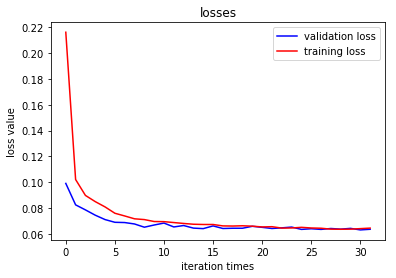

In [3]:

plt.title('losses')
steps = [i for i in range(32)]
plt.plot(steps, val_losses, color='blue', label='validation loss')
plt.plot(steps, train_losses,  color='red', label='training loss')
plt.legend() # 显示图例

plt.xlabel('iteration times')
plt.ylabel('loss value')
plt.show()


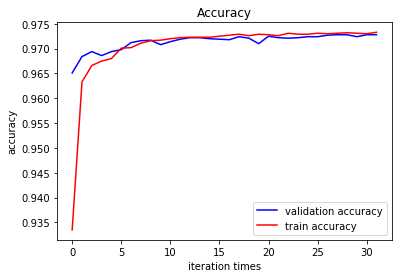

In [4]:
plt.title('Accuracy')
steps = [i for i in range(32)]
plt.plot(steps, val_accs, color='blue', label='validation accuracy')
plt.plot(steps, training_accs, color='red', label='train accuracy')
plt.legend() # 显示图例

plt.xlabel('iteration times')
plt.ylabel('accuracy')
plt.show()